In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import random
import decimal
import scipy.special
import math
from copy import copy

import sys
sys.path.append('../python_ldpc')

import ldpc_decoder
import ldpc_encoder

import commpy.sequences
import commpy.modulation
import commpy.impairments




In [2]:
# set up the LDPC encoder / decoder

alist_file = "../alist/wimax_2304_0.5.alist"

encoder = ldpc_encoder.ldpc_encoder(alist_file)

decoder = ldpc_decoder.ldpc_decoder(alist_file)

In [3]:
# Generate Random Data to transmit 

data = np.random.randint(0,2, encoder.N/2, dtype=np.bool)


In [4]:
# Encode Data

encoded_data = encoder.encode_data(data)

In [11]:
# Check Encoded Data for Errors, there should be none at this point

print ("Num Errors: %d\n" % decoder.compute_syndrome(encoded_data)),

Num Errors: 0


<IPython.core.display.Javascript object>


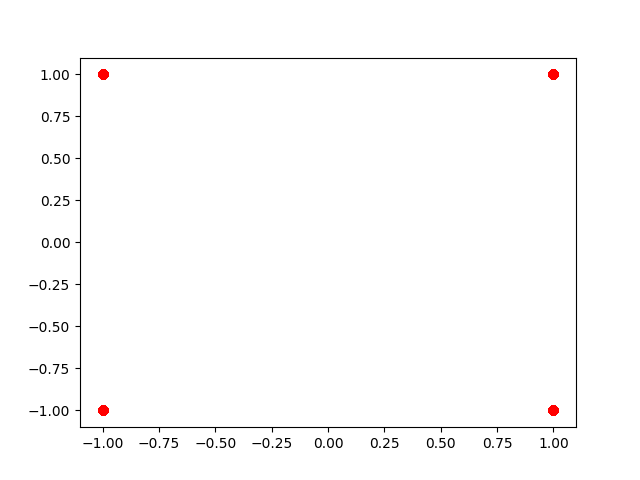

In [19]:
# Modulate the Data

# Create a QPSK modem
qpsk_modem = commpy.QAMModem(4)

# Modulate the data
modulated_data = qpsk_modem.modulate(encoded_data)

# Plot the modulated data in the complex plane
plt.figure()
plt.plot(np.real(modulated_data), np.imag(modulated_data), 'ro')